# Downloading Google Trends Data (Python version)
Google trends data can be quite usefull to understand behavioral differences in response to a public health risk, particulary when it comes to gauging the perception of such risk.

The `ggtrends` module from Epigraphhub returns the results as convenient pandas DataFrames.`

In [1]:
from epigraphhub.data.ggtrends import (
    historical_interest,
    interest_by_region,
    interest_over_time,
)
import pandas as pd
pd.options.plotting.backend = "plotly"
import warnings
warnings.filterwarnings('ignore')


## Fetch trends by region

In [2]:
keywords = ["covid", "vaccine"]
interest_by_region(keywords)

,geoCode,covid,vaccine
geoName,,,
Afghanistan,AF,65,35
Albania,AL,85,15
Algeria,DZ,97,3
American Samoa,AS,79,21
Andorra,AD,98,2
...,...,...,...
Western Sahara,EH,93,7
Yemen,YE,62,38
Zambia,ZM,74,26


## Fetching time-series 
We can get the interest overtime for a specific geographic location, using the country 2-letter ISO code. In example for Brasil, we also remind you that you have to translate the keywords to the local language.

The `interest_over_time` function will get you by default one year long series.

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

In [ ]:
iot_BR = interest_over_time(["covid", "vaccine", "vacina"], geo='BR')
iot_BR

In [ ]:
iot_BR[["covid", "vaccine", "vacina"]].plot(labels=dict(index="time", value="Popularity", variable="Terms"))

You can also drill down to subregions, and different timeframes. Below we show the same search for the state of Ceará in Brazil, from March 2022 to April 2022.

In [ ]:
iot_BR_CE = interest_over_time(["covid", "vaccine", "vacina"], geo='BR-CE', timeframe='2022-03-17 2022-04-17')
iot_BR_CE[["covid", "vaccine", "vacina"]].plot(labels={'index':"time", 'value':"Popularity", 'variable':"Terms"})

With the `historical_interest` function we can get hourly results on a time window of a maximum of one week

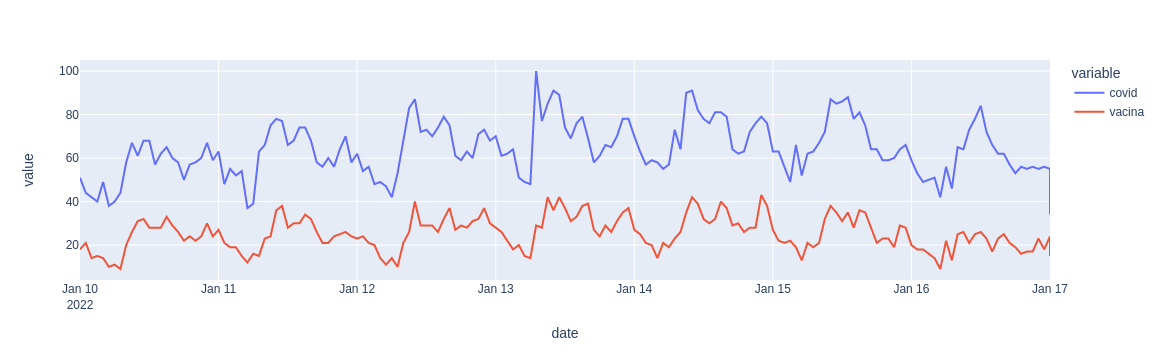

In [6]:
hi = historical_interest(["covid", "vacina"], geo='BR',year_start=2022, month_start=1,
                                day_start=10, hour_start=0, year_end=2022,
                                month_end=1, day_end=17, hour_end=0)#,frequency='hourly')
hi[["covid", "vacina"]].plot()